In [7]:
#from google.colab import drive
#drive.mount("/content/gdrive")

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df =  pd.read_csv('diabetes.csv') 

In [11]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [12]:
#checking for missing data
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
#correlation with outcome
corr_matrix = df.corr()
corr_matrix["Outcome"].sort_values(ascending=False)


Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

<AxesSubplot:>

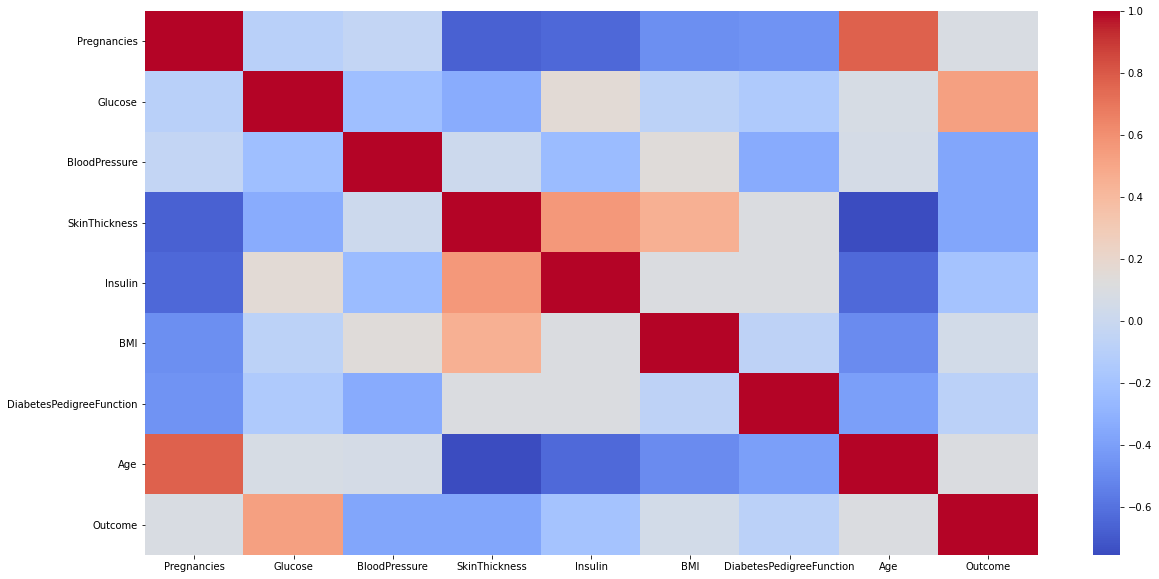

In [15]:
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix.corr(),yticklabels=True,cbar=True, cmap='coolwarm')

<AxesSubplot:>

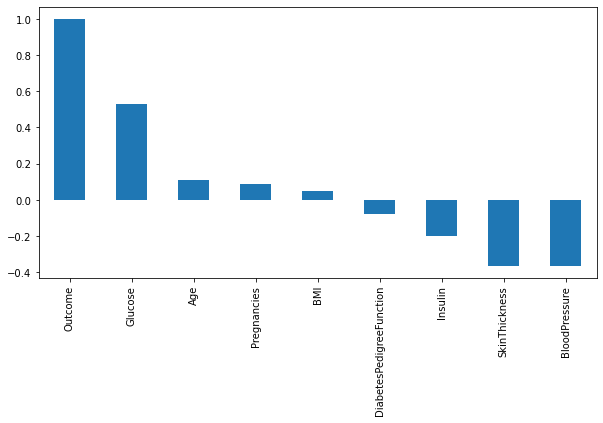

In [16]:
plt.figure(figsize=(15,10))
corr_matrix.corr()['Outcome'].sort_values(ascending=False).plot(kind='bar',figsize=(10,5))

In [17]:
#scaling data
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]=scaler.fit_transform(df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']])

In [18]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1


In [19]:
#dividing data for training
X=df.drop('Outcome', axis=1)
Y=df['Outcome']

In [20]:
#training the data
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=5)
print(len(train_set), "train +", len(test_set), "test")

614 train + 154 test


In [21]:
Xtrain,Xtest,Ytrain,Ytest= train_test_split(X,Y,test_size=0.2, random_state=42)

In [24]:
#trying to use an ensemble learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
abc_clf = AdaBoostClassifier()
dt_clf = DecisionTreeClassifier()

voting_clf = VotingClassifier( estimators=[('lr', log_clf), ('rf', rnd_clf), ('abc',abc_clf), ('dt',dt_clf)], voting='hard')
voting_clf = voting_clf.fit(Xtrain, Ytrain)
Y_pred= voting_clf.predict(Xtest)
print("Test - Accuracy :\n", metrics.accuracy_score(Ytest, Y_pred))

Test - Accuracy :
 0.7922077922077922


In [25]:
count_misclassified = (Ytest != Y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))

Misclassified samples: 32


In [26]:
# generate evaluation metrics for testing
print("Test - classification report :\n", metrics.classification_report(Ytest, voting_clf.predict(Xtest)))

Test - classification report :
               precision    recall  f1-score   support

           0       0.81      0.89      0.85        99
           1       0.76      0.62      0.68        55

    accuracy                           0.79       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.79      0.79      0.79       154



In [27]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
Y_pred = voting_clf.predict(Xtest)
confusion_matrix(Ytest,Y_pred)
pd.crosstab(Ytest, Y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,88,11,99
1,21,34,55
All,109,45,154


In [28]:
print('For deployment we will use ensemble learning since it gave the highest accuracy and the lowest misclassified samples compared to KNN and Decision tree Classifiers. ')

For deployment we will use ensemble learning since it gave the highest accuracy and the lowest misclassified samples compared to KNN and Decision tree Classifiers. 


In [29]:
import pickle

In [30]:
with open('model.pkl','wb') as file:
  pickle.dump(voting_clf,file)